In [1]:
import pandas as pd
import os

folder_path = './' 
file_names = ['users_combined_info_500_part_1.csv', 
              'users_combined_info_500_part_2.csv',
              'users_combined_info_500_part_3.csv',
              'users_combined_info_500_part_4.csv',
              'users_combined_info_500_part_5.csv']

# 使用列表推导式读取每个文件并将它们合并
dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in file_names]

# 合并所有数据框
combined_df = pd.concat(dfs, ignore_index=True)

# 将合并后的数据保存到新的 CSV 文件
combined_df.to_csv(os.path.join(folder_path, 'users_combined_info_500_combined.csv'), index=False)

print("文件合并完成，保存在 'users_combined_info_500_combined.csv'")

文件合并完成，保存在 'users_combined_info_500_combined.csv'


1. 人口统计分析
国家和地区分布
目标：统计用户所在国家和地区的分布，识别主要的开发者集中地。
方法：根据用户信息中的国家或地区字段，使用 pandas 对数据进行分组和计数。

<Axes: title={'center': '开发者国家分布'}, xlabel='country'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24320 (\N{CJK UNIFIED IDEOGRAPH-5F00}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20998 (\N{

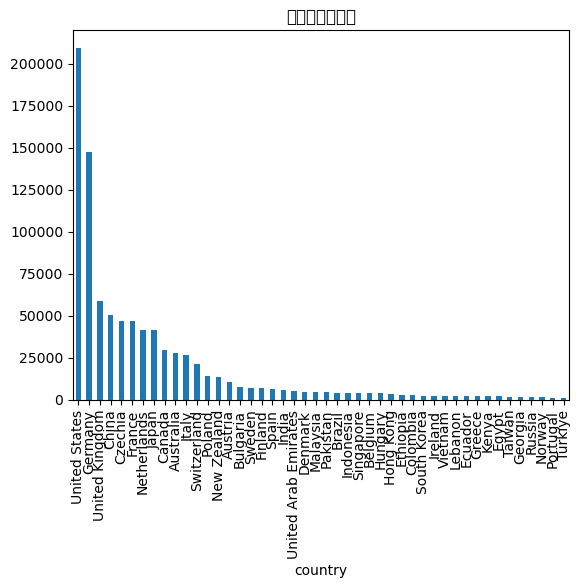

In [3]:
import pandas as pd

# 加载数据集
df = pd.read_csv('users_combined_info_500_combined.csv') 

country_distribution = df['country'].value_counts()
country_distribution.plot(kind='bar', title='开发者国家分布')

城市级别分布
目标：分析主要城市的开发者密度，发现技术热点区域。
方法：如果数据中包含城市信息，可以对城市字段进行计数。通过 groupby 和 value_counts 生成城市分布图。

<Axes: title={'center': '主要城市开发者密度'}, xlabel='location'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22478 (\N{CJK UNIFIED IDEOGRAPH-57CE}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24320 (\N{CJK UNIFIED IDEOGRAPH-5F00}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21457 (\N{

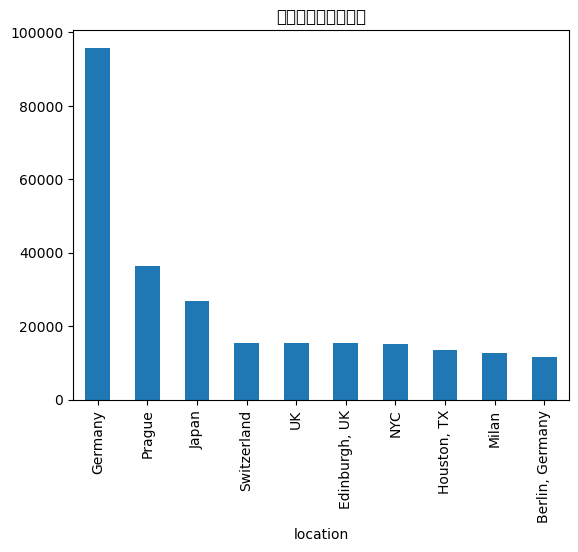

In [5]:
# 统计城市分布
city_distribution = df['location'].value_counts()

# 可视化城市分布
city_distribution.head(10).plot(kind='bar', title='主要城市开发者密度')

时区分布
目标：了解用户的时区分布，分析不同地区用户的协作时间模式。
方法：分析时区字段，统计各时区的用户数量，生成时区分布图。

<Axes: title={'center': '用户时区分布'}, ylabel='count'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24067 (\N{

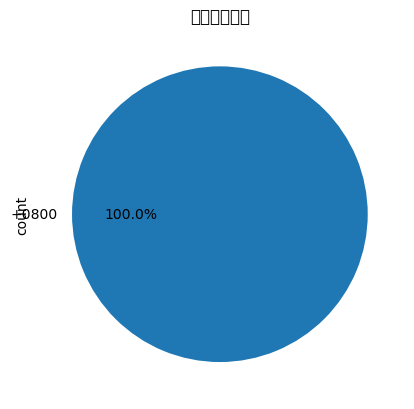

In [10]:
# 确保 event_time 列是时间格式
df['event_time'] = pd.to_datetime(df['event_time'])

# 提取时区偏移（假设时区格式是 '±hh:mm'）
df['timezone'] = df['event_time'].dt.strftime('%z')

# 统计时区分布
timezone_distribution = df['timezone'].value_counts()

# 可视化时区分布
timezone_distribution.plot(kind='pie', autopct='%1.1f%%', title='用户时区分布')

<Axes: title={'center': '一天内提交时间分布'}, xlabel='小时', ylabel='提交次数'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22825 (\N{

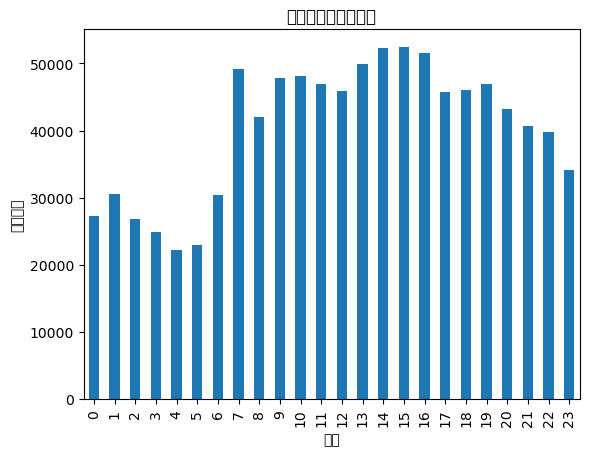

In [15]:
import pandas as pd

# 确保 event_time 是时间格式
df['event_time'] = pd.to_datetime(df['event_time'])

# 提取小时
df['event_hour'] = df['event_time'].dt.hour

# 统计每小时的提交次数
hourly_distribution = df['event_hour'].value_counts().sort_index()

# 可视化提交时间分布
hourly_distribution.plot(kind='bar', title='一天内提交时间分布', xlabel='小时', ylabel='提交次数')

<Axes: title={'center': '提交时间分布'}, xlabel='event_hour'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24067 (\N{

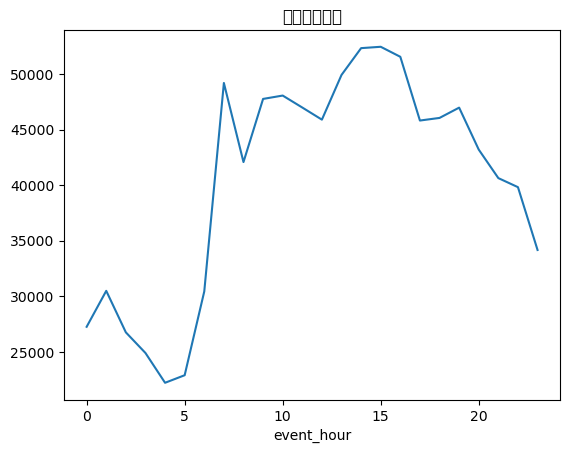

In [14]:
# 确保 'event_time' 列是时间格式
df['event_time'] = pd.to_datetime(df['event_time'])

# 提取小时
df['event_hour'] = df['event_time'].dt.hour

# 统计每小时提交的频率
event_hour_distribution = df['event_hour'].value_counts().sort_index()

# 可视化提交时间分布
event_hour_distribution.plot(kind='line', title='提交时间分布')

提交频率
目标：统计每个用户的提交次数，识别高活跃用户和低活跃用户。
方法：对用户的提交记录进行计数，根据提交次数分组，找出活跃度较高和较低的用户。

<Axes: title={'center': '提交频率分布'}, ylabel='Frequency'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24067 (\N{

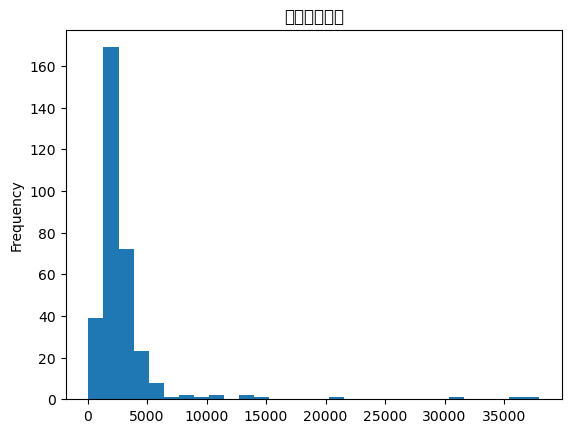

In [7]:
# 按 user_id 统计提交次数
user_commit_frequency = df.groupby('user_id')['event_type'].count()

# 可视化提交频率分布
user_commit_frequency.plot(kind='hist', bins=30, title='提交频率分布')

识别大多数用户的提交行为
观察主峰：图中最大的柱状条位于较低的提交次数区间（如 0-5000）。可以分析这些用户的具体分布特征：
统计中位数和分位数：计算提交次数的中位数和 25%、75% 分位数，用于描述用户的典型提交次数范围。

In [18]:
median_commit = user_commit_counts.median()
quantiles = user_commit_counts.quantile([0.25, 0.75])
print(f"提交次数的中位数: {median_commit}")
print(f"提交次数的 25% 和 75% 分位数: {quantiles}")

提交次数的中位数: 2234.0
提交次数的 25% 和 75% 分位数: 0.25    1726.75
0.75    2986.25
dtype: float64


1. 分类用户活跃度
根据分位数，将用户划分为以下三类：

低活跃用户：提交次数 ≤ 1727
中等活跃用户：提交次数在 1727 - 2986 之间
高活跃用户：提交次数 > 2986

activity_level
中等活跃用户    162
低活跃用户      81
高活跃用户      81
Name: count, dtype: int64


<Axes: title={'center': '用户活跃度分布'}, xlabel='活跃度分类', ylabel='用户数量'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 36291 (\N{

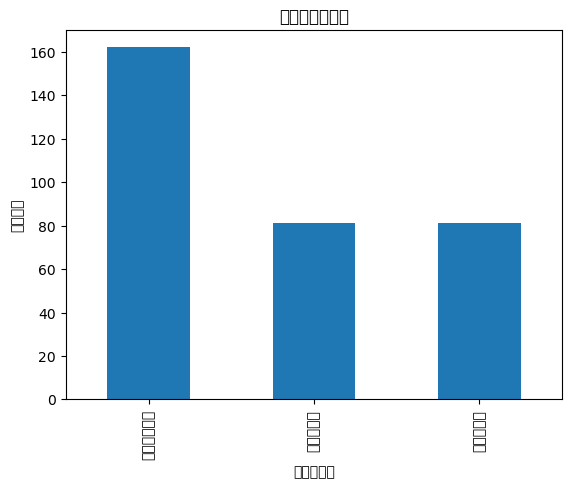

In [22]:
# 定义活跃度分类
def classify_activity(count):
    if count <= 1727:
        return '低活跃用户'
    elif count <= 2986:
        return '中等活跃用户'
    else:
        return '高活跃用户'

# 添加用户活跃度分类
user_commit_counts_df = user_commit_counts.reset_index()
user_commit_counts_df.columns = ['user_id', 'commit_count']
user_commit_counts_df['activity_level'] = user_commit_counts_df['commit_count'].apply(classify_activity)

# 统计各类用户数量
activity_summary = user_commit_counts_df['activity_level'].value_counts()
print(activity_summary)

# 可视化活跃度分布
activity_summary.plot(kind='bar', title='用户活跃度分布', xlabel='活跃度分类', ylabel='用户数量')

洞察 1：用户的提交类型偏好（event_type 分布）
分析目标：了解用户参与的不同提交类型的分布情况。例如，用户是更倾向于创建新事件（CreateEvent）、推送代码（PushEvent），还是其他活动类型。
意义：可以帮助识别用户的主要贡献类型，例如是以新功能开发为主还是代码维护为主。

<Axes: title={'center': '提交类型分布'}, xlabel='提交类型', ylabel='数量'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22411 (\N{

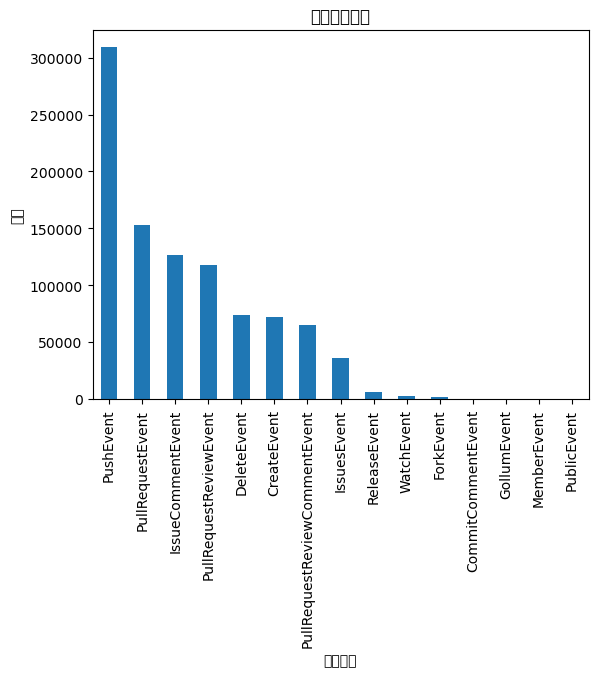

In [23]:
# 统计不同提交类型的分布
event_type_distribution = df['event_type'].value_counts()

# 可视化提交类型分布
event_type_distribution.plot(kind='bar', title='提交类型分布', xlabel='提交类型', ylabel='数量')

<Axes: title={'center': '不同活跃度用户的提交类型分布'}, xlabel='活跃度分类', ylabel='数量'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 36291 (\N{

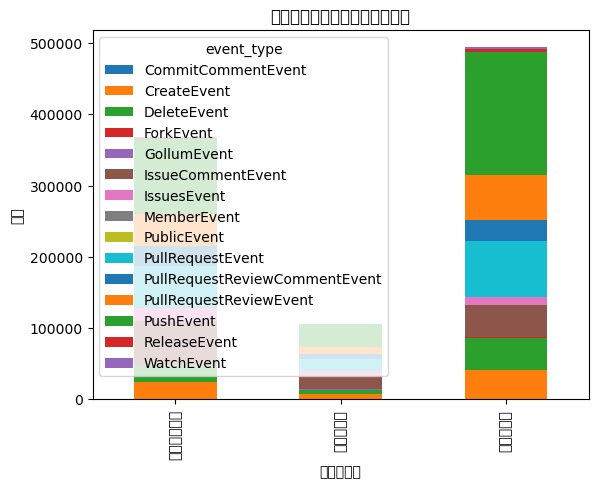

In [24]:
# 合并活跃度分类数据
merged_df = pd.merge(df, user_commit_counts_df[['user_id', 'activity_level']], on='user_id')

# 按活动等级统计提交类型分布
event_type_by_activity = merged_df.groupby(['activity_level', 'event_type']).size().unstack().fillna(0)

# 可视化不同活动等级的提交类型分布
event_type_by_activity.plot(kind='bar', stacked=True, title='不同活跃度用户的提交类型分布', xlabel='活跃度分类', ylabel='数量')

洞察 2：影响力（total_influence）与提交频率的关系
分析目标：研究用户的影响力是否与其提交频率相关。比如，高活跃用户是否拥有更高的影响力，或者某些低活跃用户是否拥有异常高的影响力。
意义：识别影响力高的用户群体，以及如何提升其他用户的影响力。

提交频率与影响力的相关性: 0.23


<Axes: title={'center': '不同活跃度用户的平均影响力'}, xlabel='活跃度分类', ylabel='平均影响力'>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21709 (\N{CJK UNIFIED IDEOGRAPH-54CD}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 19981 (\N{

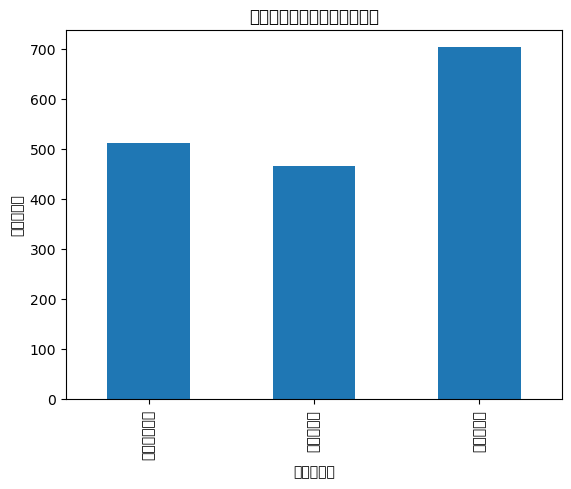

In [25]:
# 计算提交频率和影响力的关系
influence_commit_correlation = df.groupby('user_id')['total_influence'].mean().corr(user_commit_counts)
print(f"提交频率与影响力的相关性: {influence_commit_correlation:.2f}")

# 按活跃度分类分析平均影响力
activity_influence_summary = merged_df.groupby('activity_level')['total_influence'].mean()

# 可视化活跃度与影响力的关系
activity_influence_summary.plot(kind='bar', title='不同活跃度用户的平均影响力', xlabel='活跃度分类', ylabel='平均影响力')